In [59]:
import pandas as pd
import  csv

### Attributes selection

In [70]:
encodings = ['OG-F','HG-F','ST-F']#, 'OGQ', 'OGSM', 'OGET', 'DG', 'HG']
scale=['minMax', 'standard']
features = ['all','LR10', 'LR20', 'LR30', 'LR40', 'FS_S', 'FS_P', 'FS_K', 'RF']
path = "../datasets/results/features/ianuarie2025-v2"

for st in scale:
    d={}
    for encoding in encodings:
        for f in features:
            df = pd.read_csv(f'{path}/{encoding}/features_{f}_{st}.csv')
            for column in df.columns:
                if column in d:
                    d[column].append(f'{encoding}-{f}')
                else:
                    d[column]=[f'{encoding}-{f}']

    #print(d)
    with open(f'{path}/{st}.csv', 'w', newline='') as csvfile:
        spamwriter = csv.writer(csvfile, delimiter=';')
        ff = ['FF','no','encodings']
        #ff.extend(d['Unnamed: 0'])
        
        spamwriter.writerow(ff)
        for k,v in d.items():
            if k == 'Unnamed: 0': continue
            l = [k, len(v), v]
            # l.extend([0]*(len(ff)-1))
            # for counter, encod in enumerate(ff):
            #     if encod in v:
            #         l[counter] = 1
            spamwriter.writerow(l)
                

### Prediction

In [2]:
def read_file(file_name, path ="../datasets/results/bom-info-iulie/results-ml"):
    return  pd.read_csv(f'{path}/{file_name}') 


In [3]:
encodings = ['OG', 'OGQ', 'OGSM', 'OGET', 'DG', 'HG']
def build_ranks(data):
    rank_data = pd.DataFrame()
    rank_data['FS'] = data.loc[:, 'R2']
    for encoding in encodings: 
        rank_data[f'{encoding}_rank'] = data[encoding].rank(ascending=False) 
    rank_data['mean'] = rank_data.iloc[:, 1:len(encodings)+1].mean(axis=1)
    return rank_data

In [65]:
encodings = ['OG', 'OGQ', 'OGSM', 'OGET', 'DG', 'HG']
features = ['all', 'PCA99', 'PCA999', 'PCA9999',
'LR10', 'LR20', 'LR30', 'LR40', 'FS_S', 'FS_P', 'FS_K', 'RF']
def build_ranks_line(data):
    rank_data = pd.DataFrame(columns=encodings)
    #rank_data['FS'] = data.loc[:, 'R2']
    # rank_data.colums = data.columns
    # print(rank_data)
    i=0
    print('rank_data', rank_data)
    for feature in features:
        el =data.iloc[i,1:5].rank(ascending=False)
        i +=1
        rank_data.loc[feature] = el
        #rank_data[f'{encoding}_rank'] =  
    rank_data.loc['mean'] = rank_data.mean()
    return rank_data


In [66]:
data_rfr = read_file("rfr-test.csv")
build_ranks_line(data_rfr)

rank_data Empty DataFrame
Columns: [OG, OGQ, OGSM, OGET, DG, HG]
Index: []


,OG,OGQ,OGSM,OGET,DG,HG
all,4.00,1.000000,2.000000,3.000000,NaN,NaN
PCA99,2.00,4.000000,1.000000,3.000000,NaN,NaN
PCA999,3.00,4.000000,1.000000,2.000000,NaN,NaN
PCA9999,3.00,4.000000,1.000000,2.000000,NaN,NaN
LR10,3.00,1.000000,2.000000,4.000000,NaN,NaN
LR20,4.00,3.000000,1.000000,2.000000,NaN,NaN
LR30,2.00,1.000000,3.000000,4.000000,NaN,NaN
LR40,2.00,1.000000,3.000000,4.000000,NaN,NaN
FS_S,4.00,3.000000,1.000000,2.000000,NaN,NaN
FS_P,4.00,1.000000,2.000000,3.000000,NaN,NaN


In [ ]:
data_rfr = read_file("rfr-test.csv")
build_rank(data_rfr)

In [67]:
data_gbr = read_file("gbr-train.csv")
build_ranks(data_gbr)
build_ranks_line(data_gbr)

rank_data Empty DataFrame
Columns: [OG, OGQ, OGSM, OGET, DG, HG]
Index: []


,OG,OGQ,OGSM,OGET,DG,HG
all,4.00,3.000000,1.000000,2.00,NaN,NaN
PCA99,3.00,2.000000,1.000000,4.00,NaN,NaN
PCA999,3.00,4.000000,1.000000,2.00,NaN,NaN
PCA9999,2.00,3.000000,4.000000,1.00,NaN,NaN
LR10,3.00,4.000000,2.000000,1.00,NaN,NaN
LR20,3.00,4.000000,1.000000,2.00,NaN,NaN
LR30,1.00,4.000000,3.000000,2.00,NaN,NaN
LR40,2.00,4.000000,1.000000,3.00,NaN,NaN
FS_S,4.00,3.000000,1.000000,2.00,NaN,NaN
FS_P,1.00,4.000000,2.000000,3.00,NaN,NaN


In [68]:
data_svr = read_file("svr-train.csv")
build_ranks(data_svr)
build_ranks_line(data_svr)

rank_data Empty DataFrame
Columns: [OG, OGQ, OGSM, OGET, DG, HG]
Index: []


,OG,OGQ,OGSM,OGET,DG,HG
all,3.000000,4.000000,1.000000,2.000000,NaN,NaN
PCA99,2.000000,3.000000,4.000000,1.000000,NaN,NaN
PCA999,3.000000,2.000000,4.000000,1.000000,NaN,NaN
PCA9999,2.000000,3.000000,4.000000,1.000000,NaN,NaN
LR10,1.000000,2.000000,4.000000,3.000000,NaN,NaN
LR20,4.000000,3.000000,1.000000,2.000000,NaN,NaN
LR30,2.000000,4.000000,3.000000,1.000000,NaN,NaN
LR40,1.000000,3.000000,2.000000,4.000000,NaN,NaN
FS_S,2.000000,3.000000,4.000000,1.000000,NaN,NaN
FS_P,4.000000,2.000000,3.000000,1.000000,NaN,NaN


In [65]:
idx_X_train= [ 50, 40, 154,  13, 124,  36,  71, 205, 197, 105, 199,   0,   6,  48, 230,   2, 141,   8,
     204, 229,   7,  57, 239, 176, 168, 240,  21, 188, 144, 243, 191, 214,  78, 192, 202, 163,
     106,  14, 190,  68, 115,  56,  34,  28,  75, 221, 224, 142, 138, 122, 212, 206, 185, 109,
     238,  95, 219, 128, 234, 100, 245,  79,  25,  62,  46,  87,  64,  59, 125, 157,  63,  69,
     220,   3,  38, 123, 183, 139, 177,  85,   4,  86, 170, 120, 196,  41, 147, 180,   1, 216,
     208,  19,  93,  30,  32,  24, 145, 103,  20,  91,  18,  31,  15, 193,  22, 173, 182, 211,
      82, 210,  66, 111,  27,  73, 218, 135, 159,  33, 203, 152, 130, 114, 232,  67, 153,  83,
      84, 215, 158, 150, 175, 242, 129, 131,  65, 241, 213,   5,  97, 225, 137, 181,  54, 134,
      51, 200, 198,  12, 247, 108, 178,  29, 132, 118, 189, 187, 235,  16, 231,  96,  80, 133,
     209, 104, 223, 148, 236, 113, 110, 228, 117, 171,  74, 184, 246, 164, 169, 121,  89, 172,
      92,  58, 226,  98, 156,  35,   9, 165,  37,  61,  39,  55,  47, 102, 116, 136, 227, 201,
      45]
idx_X_test= [174,  17, 186, 248, 161, 126,  52, 143,  72,  94, 155,  49, 166, 140,  43,  11,  23, 149,
          44, 195, 151, 162, 244, 160,  81,  70, 112, 194, 127, 101, 167,  90, 207, 119, 222, 233,
         217, 237,  60,  26,  88, 146,  76, 179,  53,  77,  42, 107,  99,  10]
    

In [76]:
datasets_name=['deep','wide','fjssp-h','fjssp-g','dyuthi','2asp','2asp-50','mixed']
datasets_index=[37,87,127,132,160,178,210,248]
min_in_train = []
in_train = [0]*len(datasets_index)
for el in idx_X_test:
    index = 0
    for bound in datasets_index:
        if el <= bound:
            in_train[index] += 1
            break
        index += 1
print(in_train)
for i in range(len(in_train)):
    if i == 0:
        el_no = datasets_index[i] + 1
    else:
        el_no = datasets_index[i] + 1 - datasets_index[i-1]
    print("dataset", "20%", "actual in test data")
    min_in_train.append(0.2*el_no)
    print(datasets_name[i], 0.2*el_no, in_train[i]   )
            
df = pd.DataFrame()

df.insert(0, "Dataset", datasets_name, True)
df.insert(1, "20%", min_in_train, True)
df.insert(2, "Actual", in_train, True)

df

[5, 12, 10, 0, 7, 5, 5, 6]
dataset 20% actual in test data
deep 7.6000000000000005 5
dataset 20% actual in test data
wide 10.200000000000001 12
dataset 20% actual in test data
fjssp-h 8.200000000000001 10
dataset 20% actual in test data
fjssp-g 1.2000000000000002 0
dataset 20% actual in test data
dyuthi 5.800000000000001 7
dataset 20% actual in test data
2asp 3.8000000000000003 5
dataset 20% actual in test data
2asp-50 6.6000000000000005 5
dataset 20% actual in test data
mixed 7.800000000000001 6


,Dataset,20%,Actual
0,deep,7.6,5
1,wide,10.2,12
2,fjssp-h,8.2,10
3,fjssp-g,1.2,0
4,dyuthi,5.8,7
5,2asp,3.8,5
6,2asp-50,6.6,5
7,mixed,7.8,6


In [16]:
import pandas as pd
import re

with open('regresion-v4.txt', 'r') as file:
    lines = file.readlines()
    i=0
    pattern = r"\*{7} Feature select: (\w+)  Feature type: (\w+-\w+) Regression model: (\w+) \*{6}"
    pattern_int = r"-?0\.\d+"

    dict_train = {'rfr_feat':[], 'rfr_val':[],'gbr_feat':[],'gbr_val':[], 'svr_feat':[], 'svr_val':[], 'kr_feat': [], 'kr_val':[], 'mlp_feat': [], 'mlp_val':[]}
    dict_validation = {'rfr_feat':[], 'rfr_val':[],'gbr_feat':[],'gbr_val':[], 'svr_feat':[], 'svr_val':[], 'kr_feat': [], 'kr_val':[], 'mlp_feat': [], 'mlp_val':[]}
    dict_test = {'rfr_feat':[], 'rfr_val':[],'gbr_feat':[],'gbr_val':[], 'svr_feat':[], 'svr_val':[], 'kr_feat' : [], 'kr_val':[], 'mlp_feat': [], 'mlp_val':[]}

    dict_Kendall_train = {'rfr_feat':[], 'rfr_val':[],'gbr_feat':[],'gbr_val':[], 'svr_feat':[], 'svr_val':[], 'kr_feat' : [], 'kr_val':[], 'mlp_feat': [], 'mlp_val':[]}
    dict_Kendall_test = {'rfr_feat':[], 'rfr_val':[],'gbr_feat':[],'gbr_val':[], 'svr_feat':[], 'svr_val':[], 'kr_feat' : [], 'kr_val':[], 'mlp_feat': [], 'mlp_val':[]}

    train, test, validation, k_train, k_test = None, None, None, None, None
    while(i<len(lines)):
       
        #print(lines[i])
        # Search for the pattern in the text
        match = re.search(pattern, lines[i])
        
        # Extract and print the captured groups
        if match:
            #print(line)
            feature_select = match.group(1)
            feature_type = match.group(2)
            regression_model = match.group(3)
            
            # print("Feature select:", feature_select)
            # print("Feature type:", feature_type)
            # print("Regression model:", regression_model)

            #print(pattern_int, lines[i+1].split(":")[1])
            while not lines[i+1].startswith("R2"): i+=1
                
            match_int = re.search(pattern_int, lines[i+1].split(":")[1].strip())
            if match_int:
                train = float(match_int.group())

            match_int = re.search(pattern_int, lines[i+2].split(":")[1].strip())
            #print('i+2', lines[i+2], match_int)
            if match_int:
                validation = float(match_int.group())

            match_int = re.search(pattern_int, lines[i+3].split(":")[1].strip())
            if match_int:
                test = float(match_int.group())

            match_int = re.search(pattern_int, lines[i+4].split(":")[1].strip())
            if match_int:
                k_train = float(match_int.group())

            match_int = re.search(pattern_int, lines[i+5].split(":")[1].strip())
            if match_int:
                k_test = float(match_int.group())

            #print(train, validation, test)
            dict_train[f'{regression_model}_feat'].append( (feature_type, feature_select))
            dict_train[f'{regression_model}_val'].append(train)
    
            dict_validation[f'{regression_model}_feat'].append((feature_type, feature_select))
            dict_validation[f'{regression_model}_val'].append(validation)
    
            dict_test[f'{regression_model}_feat'].append((feature_type, feature_select))
            dict_test[f'{regression_model}_val'].append(test)

            dict_Kendall_train[f'{regression_model}_feat'].append((feature_type, feature_select))
            dict_Kendall_train[f'{regression_model}_val'].append(k_train)

            dict_Kendall_test[f'{regression_model}_feat'].append((feature_type, feature_select))
            dict_Kendall_test[f'{regression_model}_val'].append(k_test)
            
            i+=6
        else:
            print("No match found")
        i+=1
#print(dict_train)
# pd.DataFrame(dict_train).to_csv("train-st.csv")
# pd.DataFrame(dict_validation).to_csv("validation-st.csv")
# pd.DataFrame(dict_test).to_csv("test.csvst")

print("train\n", pd.DataFrame(dict_train).filter(items=['rfr_feat', 'rfr_val', 'gbr_val', 'svr_val', 'kr_val','mlp_val' ]))
print("validation\n", pd.DataFrame(dict_validation).filter(items=['rfr_feat', 'rfr_val', 'gbr_val', 'svr_val', 'kr_val','mlp_val' ]))
print("test\n", pd.DataFrame(dict_test).filter(items=['rfr_feat', 'rfr_val', 'gbr_val', 'svr_val', 'kr_val','mlp_val' ]))
print("train k\n", pd.DataFrame(dict_Kendall_train).filter(items=['rfr_feat', 'rfr_val', 'gbr_val', 'svr_val', 'kr_val', 'mlp_val' ]))
print("test k\n", pd.DataFrame(dict_Kendall_test).filter(items=['rfr_feat', 'rfr_val', 'gbr_val', 'svr_val', 'kr_val','mlp_val'  ]))

No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match found
No match f

In [4]:
import pandas as pd
import re

with open('multiclass+multilabel.txt', 'r') as file:
    lines = file.readlines()
    i=0
    pattern = r"\*{7} Feature select: (\w+)  Feature type: (\w+-\w+) Classification model: (\w+) \*{6}"
    pattern_hamming = r"Hamming loss: (0\.\d+)"
    pattern_int = r"0\.\d+"

    dict_h = {'rfc_feat':[], 'rfc_val':[], 'svc_feat':[], 'svc_val':[]} #'gbc_feat':[],'gbc_val':[],
    #dict_h = {'rfr_feat':[], 'rfr_val':[],'gbr_feat':[],'gbr_val':[], 'svr_feat':[], 'svr_val':[]}

    next_run = True
    while(i<len(lines)):
        # Search for the pattern in the text
        match = re.search(pattern, lines[i])
        
        
        # Extract and print the captured groups
        if match:
            feature_select = match.group(1)
            feature_type = match.group(2)
            classification_model = match.group(3)
            #print(feature_select, feature_type, classification_model)
        
        match = re.search(pattern_hamming, lines[i])
        
        # Extract and print the captured groups
        if match:
            value = match.group(1)
            #print("'", feature_select, "' '", feature_type, "' '", classification_model,   "'", value)
            dict_h[f'{classification_model}_feat'].append( (feature_type, feature_select))
            dict_h[f'{classification_model}_val'].append(value)

        i+=1
#print(dict_h)
pd.DataFrame(dict_h).to_csv("classification-mm.csv")
print("Hamming\n", pd.DataFrame(dict_h).filter(items=['rfr_feat', 'rfr_val', 'gbr_val', 'svr_val' ]))

Hamming
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [ ]:
{'rfr_feat': 
 [('OG-F', 'all'), ('OG-F', 'LR10'), ('OG-F', 'LR20'), ('OG-F', 'LR30'), ('OG-F', 'LR40'), ('OG-F', 'RF'), ('OG-F', 'PCA99'), ('OG-F', 'PCA999'), ('OG-F', 'PCA9999'), ('OG-F', 'FS_S'), ('OG-F', 'FS_P'), ('OG-F', 'FS_K'), 
  ('HG-F', 'all'), ('HG-F', 'LR10'), ('HG-F', 'LR20'), ('HG-F', 'LR30'), ('HG-F', 'LR40'), ('HG-F', 'RF'), ('HG-F', 'PCA99'), ('HG-F', 'PCA999'), ('HG-F', 'PCA9999'), ('HG-F', 'FS_S'), ('HG-F', 'FS_P'), ('HG-F', 'FS_K')], 
 'rfr_val': ['0.1431451612903226', '0.17943548387096775', '0.1774193548387097', '0.20766129032258066', '0.14516129032258066', '0.16129032258064516', '0.16330645161290322', '0.15120967741935484', '0.1693548387096774', '0.15524193548387097', '0.14717741935483872', '0.19959677419354838', '0.20967741935483872', '0.15120967741935484', '0.14919354838709678', '0.16733870967741934', '0.14717741935483872', '0.1693548387096774', '0.22983870967741934', '0.1532258064516129', '0.2157258064516129', '0.14112903225806453', '0.1350806451612903', '0.13911290322580644'], 
 'gbr_feat': [('OG-F', 'all'), ('OG-F', 'LR10'), ('OG-F', 'LR20'), ('OG-F', 'LR30'), ('OG-F', 'LR40'), ('OG-F', 'RF'), ('OG-F', 'PCA99'), ('OG-F', 'PCA999'), ('OG-F', 'PCA9999'), ('OG-F', 'FS_S'), ('OG-F', 'FS_P'), ('OG-F', 'FS_K'), 
              ('HG-F', 'all'), ('HG-F', 'LR10'), ('HG-F', 'LR20'), ('HG-F', 'LR30'), ('HG-F', 'LR40'), ('HG-F', 'RF'), ('HG-F', 'PCA99'), ('HG-F', 'PCA999'), ('HG-F', 'PCA9999'), ('HG-F', 'FS_S'), ('HG-F', 'FS_P'), ('HG-F', 'FS_K')], 
 'gbr_val': ['0.14717741935483872', '0.21774193548387097', '0.1875', '0.1875', '0.1875', '0.18951612903225806', '0.17137096774193547', '0.22782258064516128', '0.1814516129032258', '0.13911290322580644', '0.19153225806451613', '0.19556451612903225', '0.16129032258064516', '0.15524193548387097', '0.1693548387096774', '0.1975806451612903', '0.16129032258064516', '0.15725806451612903', '0.19556451612903225', '0.17540322580645162', '0.33669354838709675', '0.14919354838709678', '0.1774193548387097', '0.16330645161290322'], 
 'svr_feat': [('OG-F', 'all'), ('OG-F', 'LR10'), ('OG-F', 'LR20'), ('OG-F', 'LR30'), ('OG-F', 'LR40'), ('OG-F', 'RF'), ('OG-F', 'PCA99'), ('OG-F', 'PCA999'), ('OG-F', 'PCA9999'), ('OG-F', 'FS_S'), ('OG-F', 'FS_P'), ('OG-F', 'FS_K'), 
              ('ST-F', 'all'), ('ST-F', 'LR10'), ('ST-F', 'LR20'), ('ST-F', 'LR30'), ('ST-F', 'LR40'), ('ST-F', 'RF'), ('ST-F', 'PCA99'), ('ST-F', 'PCA999'), ('ST-F', 'PCA9999'), ('ST-F', 'FS_S'), ('ST-F', 'FS_P'), ('ST-F', 'FS_K')], 
 'svr_val': ['0.13911290322580644', '0.20161290322580644', '0.1935483870967742', '0.21370967741935484', '0.18548387096774194', '0.15524193548387097', '0.1532258064516129', '0.14919354838709678', '0.30443548387096775', '0.1532258064516129', '0.15120967741935484', '0.1431451612903226', '0.20967741935483872', '0.21370967741935484', '0.1975806451612903', '0.20161290322580644', '0.1975806451612903', '0.20161290322580644', '0.16532258064516128', '0.14919354838709678', '0.24193548387096775', '0.19959677419354838', '0.1774193548387097', '0.1592741935483871']}

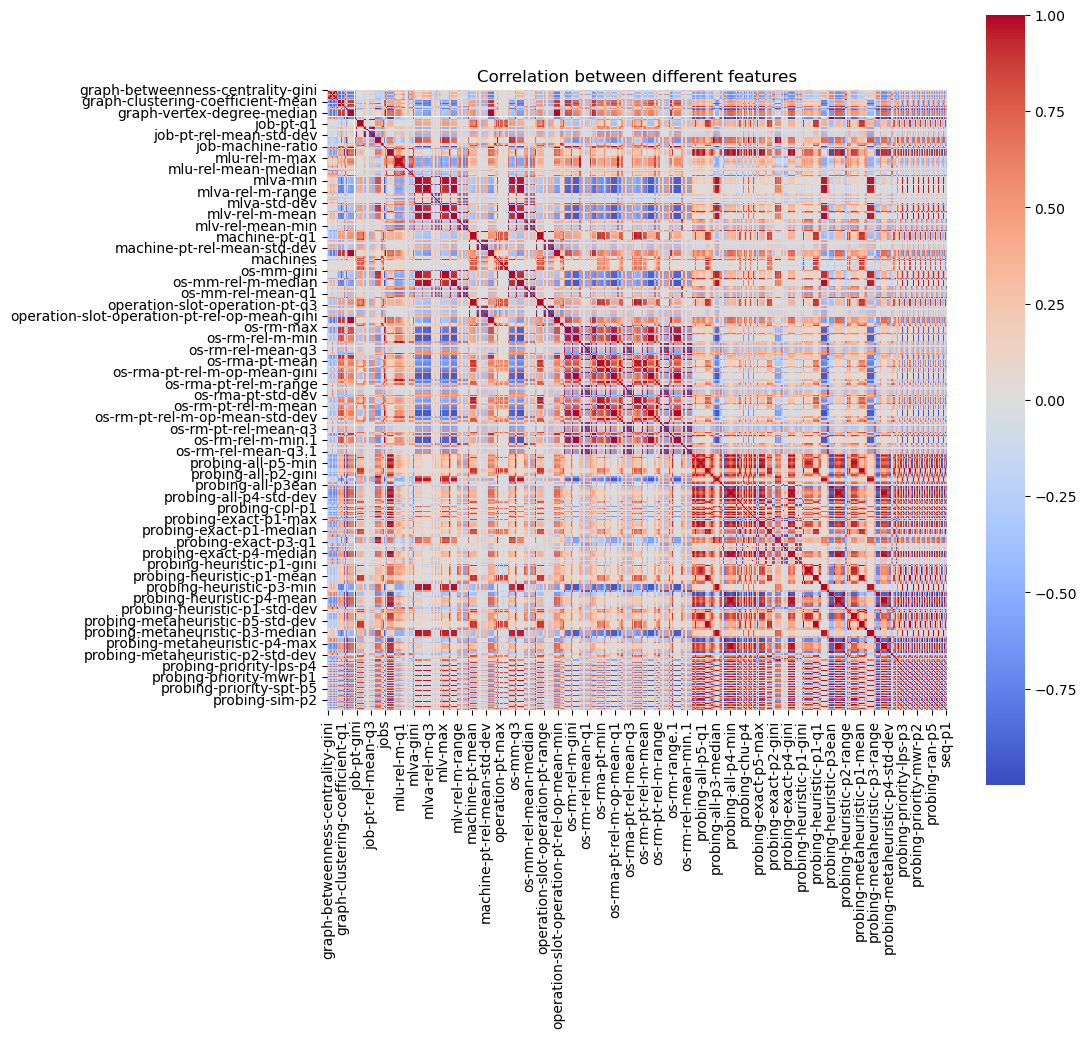

In [6]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns  # plotting library
import matplotlib.pyplot as plt

data_frame = pd.read_csv(f'features.csv') 
data_frame = data_frame.iloc[:, 1:]
correlation = data_frame.corr(method='spearman')
    
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=False, cmap='coolwarm')#, cmap='cubehelix')

plt.title('Correlation between different features')
plt.show()
#plt.savefig("corelatin.png")
        

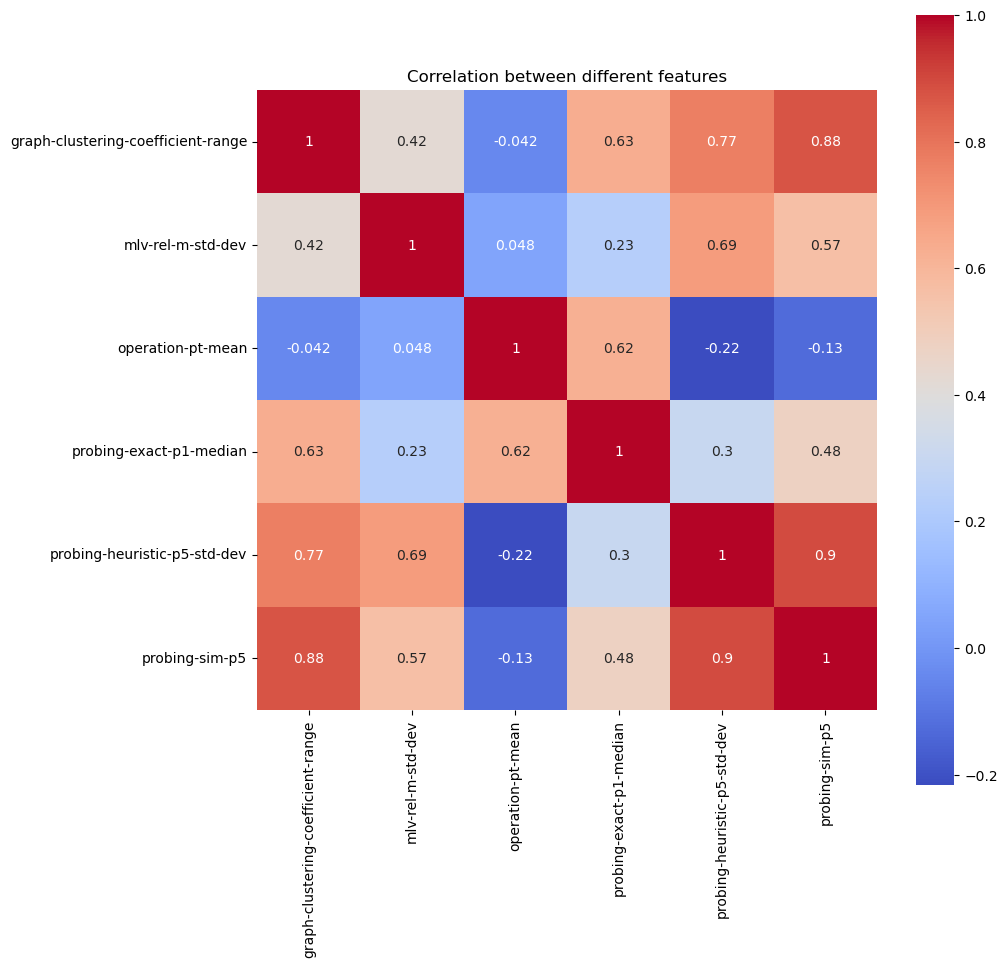

In [11]:
columns_selected=['graph-clustering-coefficient-range', 'mlv-rel-m-std-dev','operation-pt-mean', 'probing-exact-p1-median', 'probing-heuristic-p5-std-dev',
        'probing-sim-p5']
data_frame = data_frame.iloc[:, 1:]
correlation = data_frame[columns_selected].corr(method='spearman')
    
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='coolwarm')#, cmap='cubehelix')

plt.title('Correlation between different features')
plt.show()

Index(['graph-betweenness-centrality-std-dev',
       'graph-clustering-coefficient-gini', 'graph-clustering-coefficient-max',
       'graph-clustering-coefficient-mean',
       'graph-clustering-coefficient-median',
       'graph-clustering-coefficient-min', 'graph-clustering-coefficient-q1',
       'graph-clustering-coefficient-q3', 'graph-clustering-coefficient-range',
       'graph-clustering-coefficient-std-dev',
       ...
       'probing-sim-p2', 'probing-sim-p3', 'probing-sim-p4', 'probing-tab-p1',
       'probing-tab-p5', 'probing-tab-p2', 'probing-tab-p3', 'probing-tab-p4',
       'seq-p1', 'skewness'],
      dtype='object', length=596)


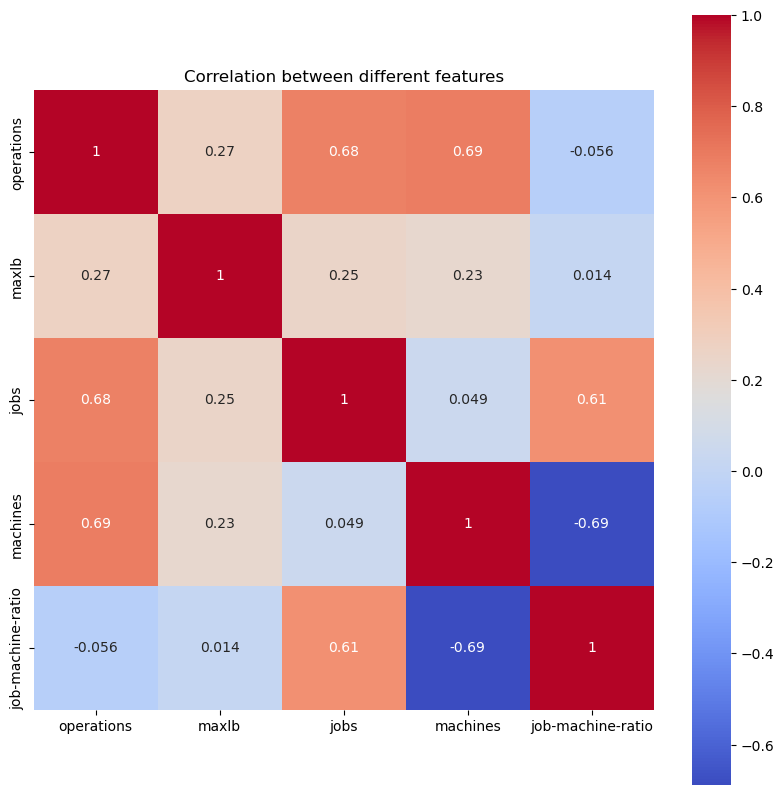

In [16]:
columns_selected=['operations', 'maxlb','jobs','machines','job-machine-ratio']#, 'seq-p1']#'seq-cmax',
print(data_frame.columns)
data_frame = data_frame.iloc[:, 1:]
correlation = data_frame[columns_selected].corr(method='spearman')
    
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='coolwarm')#, cmap='cubehelix')

plt.title('Correlation between different features')
plt.show()

In [32]:
algs=['tab','ort','ran','sim','sps','lps','lpt','mwr','chu', 'cpo']#spt

all_algs_data_frame = pd.read_csv(f'Feature+data/spt.csv') 
all_algs_data_frame.rename(columns={'cmax': 'spt_cmax'}, inplace=True)
all_algs_data_frame = all_algs_data_frame[['instance', 'spt_cmax']]
print(all_algs_data_frame)
for alg in algs:
    data_frame = pd.read_csv(f'Feature+data/{alg}.csv') 
    data_frame.rename(columns={'cmax': f'{alg}_cmax'}, inplace=True)
    all_algs_data_frame=pd.merge(all_algs_data_frame, data_frame[['instance', f'{alg}_cmax']], on='instance')
print(all_algs_data_frame)

#calculate ranks
all_algs_data_frame.iloc[:, 1:]= all_algs_data_frame.iloc[:, 1:].rank(axis=1)
print(all_algs_data_frame)
all_algs_data_frame.to_csv('Feature+data/prelucrari/ranks.csv', index=False)



     instance  spt_cmax
0        abz5    1733.0
1        abz6    1388.0
2        abz7    1151.0
3        abz8    1122.0
4        abz9    1169.0
...       ...       ...
3262  gen4221     580.0
3263  gen4222     616.0
3264  gen4223     626.0
3265  gen4224     617.0
3266  gen4225     676.0

[3267 rows x 2 columns]
     instance  spt_cmax  tab_cmax  ort_cmax  ran_cmax  sim_cmax  sps_cmax  \
0        abz5    1733.0    1234.0    1234.0    1251.0    1240.0    1429.0   
1        abz6    1388.0     943.0     943.0     960.0     946.0    1089.0   
2        abz7    1151.0     675.0     666.0     787.0     777.0     808.0   
3        abz8    1122.0     680.0     687.0     826.0     799.0     848.0   
4        abz9    1169.0     698.0     686.0     822.0     833.0     960.0   
...       ...       ...       ...       ...       ...       ...       ...   
3262  gen4221     580.0     379.0     441.0     531.0     490.0     417.0   
3263  gen4222     616.0     378.0     441.0     530.0     492.0     423

In [50]:
algs_mean_rank = all_algs_data_frame.iloc[:,1:].mean()
print(algs_mean_rank)

spt_cmax    9.494031
tab_cmax    3.199418
ort_cmax    4.264769
ran_cmax    7.202785
sim_cmax    6.235537
sps_cmax    5.402357
lps_cmax    9.827977
lpt_cmax    8.154882
mwr_cmax    5.222069
chu_cmax    4.312615
cpo_cmax    2.681512
dtype: float64


In [52]:
def find_column_name(row, alg_rank):
    name = None
    name_importance = None
    min_val = min(row[1:])
    for col in row.index:
        if row[col] == min_val:
            if name is None:
                name = col
                name_importance = alg_rank[col]
            elif alg_rank[col]<name_importance:
                 name = col
                 name_importance = alg_rank[col]
    return name
    
def class_by_alg():
    labels_set=set()
    result_data_frame = pd.DataFrame()
    data = pd.read_csv('Feature+data/prelucrari/ranks.csv')
    data['Label'] = data.apply(find_column_name, axis=1, alg_rank=algs_mean_rank)    
    labels_set.update(data['Label'])
    print(len(labels_set), labels_set)
    print(data)
    result_data_frame['Problem']=data['instance']
    result_data_frame['BestAlg']=data['Label']
    result_data_frame.to_csv('Feature+data/prelucrari/class.csv', index=False)

class_by_alg()                  

3 {'ort_cmax', 'tab_cmax', 'cpo_cmax'}
     instance  spt_cmax  tab_cmax  ort_cmax  ran_cmax  sim_cmax  sps_cmax  \
0        abz5      10.0       2.0       2.0       6.0       5.0       7.0   
1        abz6      10.0       2.5       2.5       6.0       5.0       7.0   
2        abz7      11.0       2.0       1.0       6.0       5.0       7.0   
3        abz8      10.0       1.0       2.5       6.0       5.0       7.0   
4        abz9      10.0       2.0       1.0       4.0       6.0       8.0   
...       ...       ...       ...       ...       ...       ...       ...   
3262  gen4221      10.0       2.0       6.0       9.0       7.0       3.0   
3263  gen4222      10.0       2.0       6.0       9.0       7.0       4.0   
3264  gen4223      11.0       2.0       6.0       9.0       7.0       5.0   
3265  gen4224      11.0       2.0       6.0       9.0       7.0       4.0   
3266  gen4225      11.0       2.0       5.0       9.0       7.0       3.5   

      lps_cmax  lpt_cmax  mwr_cmax  